# Food Venues Analysis in Tunis and Vienna

![Tunis](https://media-cdn.tripadvisor.com/media/photo-s/12/2b/c1/f4/tunis-bab-bahr.jpg "Tunis")

## Introduction
**Tunis** has always been one of the most important cities of North Africa. The cuisine of Tunisia, is a blend of Mediterranean and Berber cuisines. Its distinctive spiciness comes from the many civilizations which have ruled the land now known as Tunisia: Romans, Vandals, Byzantines, Arabs, Spanish, Turkish, Italians (Sicilians), French, and the native Punics-Berber people.

On the other hand, **Vienna** has been the capital of Austria for more than a thousand years. It became the cultural centre of the nation and developed its own regional cuisine. Viennese cuisine is best known for its pastries, but it includes a wide range of other unique dishes.

In this project, we will **analyse the the distribution of food venues in these two capitals : Tunis and Vienna.** We are interested in comparing the differences between the cities in their food offer.

This project will help to answer the following questions:
* Which city provides easier access to food ?
* In which city, a new food store has less competitors ?
* Where in the city, one should launch his food business ?

The target of this work is both the customer and the investor. 

For the **customer**, we will see which city provides easier access to food venues with a better spatial distribution of the venues.

For the **investor**, we will compare the offer of both cities and thus the food market “competitiveness” and we will see in which place we have more opportunity to get a successful food investment.

## Data
We will get our data essentially from **Foursquare** using their Places API.

**Foursquare API** allows us to search for a specific type of venues, to explore a particular venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location.

The access to the API is provided through the different endpoints available. The following endpoints can be helpful for this specific project:
* **Search** : Search for venues
* **Explore**: Get venue recommendations
* **Trending**: Get trending venues

We will be also using the **Geopy** library to convert addresses to latitude/longitude coordinates in order to use them in Foursquare API.

## Methodology

### Import libraries

In [3]:
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim

import folium

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import requests

### Get coordinates of Tunis and Vienna

In [4]:
tunis_address = "Tunis, TN"

geolocator = Nominatim(user_agent="tunis_agent")
location = geolocator.geocode(tunis_address)
tunis_lat = location.latitude
tunis_lon = location.longitude
print("Lat / Lon for Tunis: ", tunis_lat, tunis_lon)

Lat / Lon for Tunis:  33.8439408 9.400138


Unfortunately after verifying these cooridnates on google maps, it seems that geopy failed to get the coordinates correctly as it points to another city rather than Tunis.

Thus, I will provide the address of a known monument in Tunis to get sure that we have correct coordinates.

In [5]:
tunis_address = "Théâtre municipal de Tunis"

geolocator = Nominatim(user_agent="tunis_agent")
location = geolocator.geocode(tunis_address)
tunis_lat = location.latitude
tunis_lon = location.longitude
print("Lat / Lon for Tunis: ", tunis_lat, tunis_lon)

Lat / Lon for Tunis:  36.799113199999994 10.180810517394104


In [6]:
vienna_address = "Vienna, AU"

geolocator = Nominatim(user_agent="vienna_agent")
location = geolocator.geocode(vienna_address)
vienna_lat = location.latitude
vienna_lon = location.longitude
print("Lat / Lon for Vienna: ",vienna_lat, vienna_lon)

Lat / Lon for Vienna:  48.2144011 16.3371418


### Explore venues in Tunis

In [7]:
def search_url(lat, lon, search_query, radius, page):
    with open("foursquare.txt") as f:
        CLIENT = f.readline().replace('\n', '')
        SECRET = f.readline().replace('\n', '')
    
    VERSION = '20180604'
    LIMIT = 50
    
    return 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&offset={}'.format(CLIENT, SECRET, lat, lon, VERSION, search_query, radius, LIMIT, page)

def explore_url(lat, lon, section, radius, page):
    with open("foursquare.txt") as f:
        CLIENT = f.readline().replace('\n', '')
        SECRET = f.readline().replace('\n', '')
    
    VERSION = '20180604'
    LIMIT = 50
    
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&section={}&radius={}&limit={}&offset={}'.format(CLIENT, SECRET, lat, lon, VERSION, section, radius, LIMIT, page)

In [8]:
results = []
for page in range(1, 51):
    url = explore_url(tunis_lat, tunis_lon, 'food', 5000, page)
    result = requests.get(url).json()
    results.append(pd.json_normalize(result['response']['groups'][0]['items']))
    
tunis_df = pd.concat(results, axis=0)

In [9]:
tunis_df

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id,venue.location.crossStreet
0,e-3-4f0067789911b33a11675def-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f0067789911b33a11675def,El Ali,Rue Jemaa Ezzitouna نهج جامع الزيتونة,36.798168,10.172979,"[{'label': 'display', 'lat': 36.79816786052508...",705,...,تونس,Gouvernorat de Tunis,تونس,"[Rue Jemaa Ezzitouna نهج جامع الزيتونة, 1006 ت...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
1,e-3-50e18a5ee4b0a78b05086cc4-2,0,"[{'summary': 'This spot is popular', 'type': '...",50e18a5ee4b0a78b05086cc4,قهوة العنبة,La médina de Tunis,36.796666,10.171623,"[{'label': 'display', 'lat': 36.79666632043185...",863,...,تونس,Gouvernorat de Tunis,تونس,"[La médina de Tunis, تونس, تونس]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
2,e-3-53c844a5498e31473d090ff3-3,0,"[{'summary': 'This spot is popular', 'type': '...",53c844a5498e31473d090ff3,Café El M'rabet,27 Souk El Trouk El Kasba,36.797585,10.170224,"[{'label': 'display', 'lat': 36.79758477231989...",958,...,تونس,Gouvernorat de Tunis,تونس,"[27 Souk El Trouk El Kasba, 1008 تونس, تونس]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],La Médina,91678665,NaN
3,e-3-52877c5411d23840a48b74ce-4,0,"[{'summary': 'This spot is popular', 'type': '...",52877c5411d23840a48b74ce,Foundouk El Attarine,9 Bis Souk El Attarine,36.798073,10.171644,"[{'label': 'display', 'lat': 36.79807255891052...",825,...,Tunis-médina,Gouvernorat de Tunis,تونس,"[9 Bis Souk El Attarine, Tunis-médina, تونس]","[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN,NaN,NaN
4,e-3-4bb089daf964a5209d4a3ce3-5,0,"[{'summary': 'This spot is popular', 'type': '...",4bb089daf964a5209d4a3ce3,Dar El Jeld,5 rue Dar El Jeld,36.798531,10.169114,"[{'label': 'display', 'lat': 36.7985312079029,...",1044,...,تونس,Gouvernorat de Tunis,تونس,"[5 rue Dar El Jeld, Tunisia تونس, تونس]","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,e-3-4e24b1fb52b1a3aa2c5820ff-95,0,"[{'summary': 'This spot is popular', 'type': '...",4e24b1fb52b1a3aa2c5820ff,Tivoli,NaN,36.807814,10.138069,"[{'label': 'display', 'lat': 36.80781384249051...",3930,...,NaN,NaN,تونس,[تونس],"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN,NaN,NaN
46,e-3-4bcabdcdcc8cd13a804cbecf-96,0,"[{'summary': 'This spot is popular', 'type': '...",4bcabdcdcc8cd13a804cbecf,AFRICANA,Bardo,36.810858,10.141089,"[{'label': 'display', 'lat': 36.81085754598581...",3774,...,Le Bardo,Gouvernorat de Tunis,تونس,"[Bardo (Avenue Habib Bourguiba), 2000 Bardo, ت...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,Avenue Habib Bourguiba
47,e-3-58bfc189cc5b6a6b5462e4a8-97,0,"[{'summary': 'This spot is popular', 'type': '...",58bfc189cc5b6a6b5462e4a8,TEAVANA,NaN,36.809686,10.139195,"[{'label': 'display', 'lat': 36.809686, 'lng':...",3891,...,NaN,NaN,تونس,[تونس],"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
48,e-3-4c362c6adfb0e21e1c9eaaa8-98,0,"[{'summary': 'This spot is popular', 'type': '...",4c362c6adfb0e21e1c9eaaa8,Joe Champs,NaN,36.830397,10.219960,"[{'label': 'display', 'lat': 36.83039720143207...",4929,...,NaN,NaN,تونس,[تونس],"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",0,[],NaN,NaN,NaN


### Visualizing Food Venues of Tunis

In [ ]:
tunis_map = folium.Map(location=[tunis_lat, tunis_lon], zoom_start=13)

tunis_fg = folium.FeatureGroup(name="Map")

for lat, lon in zip(tunis_df['venue.location.lat'], tunis_df['venue.location.lng']):
    label = folium.Popup("Food Venue", parse_html=True)
    tunis_fg.add_child(folium.Circle(location=[lat, lon], popup=label, radius=1, color='red', fill=True))

tunis_map.add_child(tunis_fg)
tunis_map.add_child(folium.LayerControl())    
    
tunis_map

![Tunis venues](https://raw.githubusercontent.com/hhassen/IBM_Capstone_Project/master/images/tunis_venues.png)


### Explore the venues of Vienna

In [10]:
results = []
for page in range(1, 51):
    url = explore_url(vienna_lat, vienna_lon, 'food', 5000, page)
    result = requests.get(url).json()
    results.append(pd.json_normalize(result['response']['groups'][0]['items']))
    
vienna_df = pd.concat(results, axis=0)

vienna_df

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id,venue.location.crossStreet
0,e-3-4c828d86d8086dcb96b57752-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c828d86d8086dcb96b57752,Wetter,Payergasse 13,48.213652,16.334833,"[{'label': 'display', 'lat': 48.21365208920859...",190,...,Wien,Wien,Österreich,"[Payergasse 13, 1160 Wien, Österreich]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,NaN,NaN
1,e-3-5b0d16809b047300398e59db-2,0,"[{'summary': 'This spot is popular', 'type': '...",5b0d16809b047300398e59db,The Pelican Coffee Company,Pelikangasse 4,48.215774,16.348140,"[{'label': 'display', 'lat': 48.215774, 'lng':...",829,...,Wien,Wien,Österreich,"[Pelikangasse 4, 1090 Wien, Österreich]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
2,e-3-4b5afafbf964a52038dd28e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b5afafbf964a52038dd28e3,Hitomi Sushi,Josefstädterstraße 53,48.210085,16.346481,"[{'label': 'display', 'lat': 48.21008519508067...",843,...,Wien,Wien,Österreich,"[Josefstädterstraße 53, 1080 Wien, Österreich]","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,NaN,NaN
3,e-3-4bce153c29d4b713fdeaa7dc-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bce153c29d4b713fdeaa7dc,Konoba,Lerchenfelder Str. 66-68,48.206923,16.346753,"[{'label': 'display', 'lat': 48.20692293832334...",1096,...,Wien,Wien,Österreich,"[Lerchenfelder Str. 66-68, 1080 Wien, Österreich]","[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",0,[],NaN,NaN,NaN
4,e-3-4be2c0201dd22d7ffeb094bd-5,0,"[{'summary': 'This spot is popular', 'type': '...",4be2c0201dd22d7ffeb094bd,PARS,Lerchenfelder Strasse 149,48.208169,16.340714,"[{'label': 'display', 'lat': 48.20816905500278...",742,...,Wien,Wien,Österreich,"[Lerchenfelder Strasse 149, 1080 Wien, Österre...","[{'id': '52e81612bcbc57f1066b79f7', 'name': 'P...",0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,e-3-4c7ec155fb13a1cdd4a39ea4-95,0,"[{'summary': 'This spot is popular', 'type': '...",4c7ec155fb13a1cdd4a39ea4,Weinschenke,Franzensgasse 11,48.194426,16.359935,"[{'label': 'display', 'lat': 48.19442592497032...",2793,...,Wien,Wien,Österreich,"[Franzensgasse 11 (Schönbrunnerstrasse), 1050 ...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,Schönbrunnerstrasse
46,e-3-4b9fcbbef964a520783f37e3-96,0,"[{'summary': 'This spot is popular', 'type': '...",4b9fcbbef964a520783f37e3,Gmoakeller,Am Heumarkt 25,48.200588,16.378539,"[{'label': 'display', 'lat': 48.20058781170614...",3434,...,Wien,Wien,Österreich,"[Am Heumarkt 25, 1030 Wien, Österreich]","[{'id': '52e81612bcbc57f1066b7a01', 'name': 'A...",0,[],NaN,NaN,NaN
47,e-3-4bbc2af4e5b0d13a63026f7c-97,0,"[{'summary': 'This spot is popular', 'type': '...",4bbc2af4e5b0d13a63026f7c,Steirereck,Am Heumarkt 2A,48.204371,16.381561,"[{'label': 'display', 'lat': 48.20437126940727...",3479,...,Wien,Wien,Österreich,"[Am Heumarkt 2A, 1030 Wien, Österreich]","[{'id': '52e81612bcbc57f1066b7a01', 'name': 'A...",0,[],NaN,NaN,NaN
48,e-3-4bf6fa445ec320a1762386d3-98,0,"[{'summary': 'This spot is popular', 'type': '...",4bf6fa445ec320a1762386d3,Kuchlmasterei,Obere Weißgerberstraße 6,48.211387,16.387841,"[{'label': 'display', 'lat': 48.21138739585876...",3775,...,Wien,Wien,Österreich,"[Obere Weißgerberstraße 6, 1030 Wien, Österreich]","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],NaN,NaN,NaN


### Visualizing Food Venues of Vienna

In [ ]:
vienna_map = folium.Map(location=[vienna_lat, vienna_lon], zoom_start=13)

vienna_fg = folium.FeatureGroup(name="Map")

for lat, lon in zip(vienna_df['venue.location.lat'], vienna_df['venue.location.lng']):
    label = folium.Popup("Food Venue", parse_html=True)
    vienna_fg.add_child(folium.Circle(location=[lat, lon], popup=label, radius=1, color='red', fill=True))

vienna_map.add_child(vienna_fg)
vienna_map.add_child(folium.LayerControl())    
    
vienna_map

![Vienna venues](https://raw.githubusercontent.com/hhassen/IBM_Capstone_Project/master/images/vienna_venues.png)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Clustering
## Clustering of Tunis Food Venues

In [12]:
X = MinMaxScaler().fit_transform(tunis_df[['venue.location.lat', 'venue.location.lng']])

### Calculating the optimal number of clusters

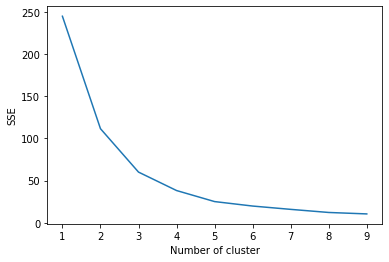

In [13]:
# Elbow Criterion Method
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
# Silhouette Coefficient Method
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5068895711348725
For n_clusters=3, The Silhouette Coefficient is 0.5850979065539464
For n_clusters=4, The Silhouette Coefficient is 0.5686525693464969
For n_clusters=5, The Silhouette Coefficient is 0.5960170130907522
For n_clusters=6, The Silhouette Coefficient is 0.602400799134145
For n_clusters=7, The Silhouette Coefficient is 0.6216381156535273
For n_clusters=8, The Silhouette Coefficient is 0.6191871172806744
For n_clusters=9, The Silhouette Coefficient is 0.5898812463196895
For n_clusters=10, The Silhouette Coefficient is 0.5913105144146849


Choosing the optimal number of clusters is not an easy task as we have to make a compromise between the numbers of clusters and the sum of squared errors or the silhouette score.

Using the **elbow method**, if the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.  In our case, the point of inflection happens when **k=3**.

On the other hand a higher **Silhouette Coefficient score** relates to a model with better-defined clusters.
A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: 

* `a: The mean distance between a sample and all other points in the same class.`
*  `b: The mean distance between a sample and all other points in the next nearest cluster.`

We cannot rely on this method with our dataset as we get increasing scores as the number of clusters k increases. Yet, we can see that k=3 is better than k=4.

So, we will divide the food venues into **3 clusters**.

In [15]:
kmeans_tunis = KMeans(n_clusters = 3, max_iter=1000)
kmeans_tunis.fit(X)
tunis_df['Cluster'] = kmeans_tunis.predict(X)

In [16]:
tunis_df['Cluster'].value_counts()

1    1235
2     881
0     384
Name: Cluster, dtype: int64

We've got three clusters having different sizes. One is big, one is medium sized and one is small sized.

### Visualizing Food Venues Clusters in Tunis

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[tunis_lat, tunis_lon], zoom_start=13)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 0.5, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tunis_df['venue.location.lat'], tunis_df['venue.location.lng'], tunis_df['Cluster'], tunis_df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

![Tunis clusters](https://raw.githubusercontent.com/hhassen/IBM_Capstone_Project/master/images/tunis_clusters.png)
Here we can see that we have a big dense cluster in the middle of the capital, and 2 smaller clusters located in the north and the west of the capital's center.
We can also notice a gap zones between the clusters where there is no food venues.

So, if you are in Tunis center you will find no problem to eat. However, as soon as you get further from the center, you will get some problems finding a place for eating.

Thus, an investor can profit from the lack of food demand in these locations to open his new restaurant.

## Clustering of Food Venues of Vienna

In [17]:
X = MinMaxScaler().fit_transform(vienna_df[['venue.location.lat', 'venue.location.lng']])

### Calculating the optimal number of clusters

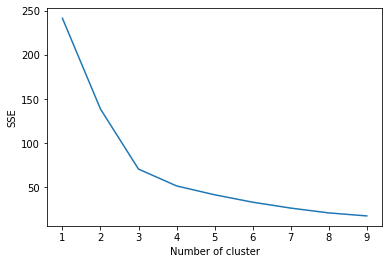

In [18]:
# Elbow Criterion Method
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [19]:
# Silhouette Coefficient Method
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4309872375829169
For n_clusters=3, The Silhouette Coefficient is 0.49526038265004124
For n_clusters=4, The Silhouette Coefficient is 0.46336634148837036
For n_clusters=5, The Silhouette Coefficient is 0.484118628542619
For n_clusters=6, The Silhouette Coefficient is 0.4996587835902473
For n_clusters=7, The Silhouette Coefficient is 0.5091078593385618
For n_clusters=8, The Silhouette Coefficient is 0.5304960246915229
For n_clusters=9, The Silhouette Coefficient is 0.5429369772206895
For n_clusters=10, The Silhouette Coefficient is 0.4919359584825413


Here again we choose to divide the Food Venues in Vienna into **3 clusters** as it's the Elbow point and it has a high silhouette score. 

In [20]:
kmeans_vienna = KMeans(n_clusters = 3, max_iter=1000)
kmeans_vienna.fit(X)
vienna_df['Cluster'] = kmeans_vienna.predict(X)

In [21]:
vienna_df['Cluster'].value_counts()

1    1197
2     988
0     315
Name: Cluster, dtype: int64

Here we get two similar big sized clusters, and a small one.

### Visualizing Food Venues Clusters in Tunis

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[vienna_lat, vienna_lon], zoom_start=13)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 0.5, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vienna_df['venue.location.lat'], vienna_df['venue.location.lng'], vienna_df['Cluster'], vienna_df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

![Vienna clusters](https://raw.githubusercontent.com/hhassen/IBM_Capstone_Project/master/images/vienna_clusters.png)
Here we can see that we have two big dense clusters in the middle of the Vienna, and a smaller cluster located in the  west of the capital's center.
In the capital center, food venues are available almost everywhere. So wherever you are, you are almost sure that you will find a food venue nearby.

The only places where you might have problems to find where to eat is in the north or the west of the capital's center. Those places are potential opportunities for investors who want to open new restaurants in Vienna.

## Conclusion


In this project, we have used Foursquare API and Geopy to gather information about food venues in both Tunis and Vienna.
After scrapping the data and cleaning it, we have created clusters using K-means on the spatial coordinates of the venues.

With the clusters visible to us, we can compare the food offer distribution between the 2 capitals.

As a **consumer viewpoint**, In Tunis, we have a big dense cluster in the center of the city where there are a lot of restaurants. However, there is a lack of food venues as soon as we get out of the Tunis center.
In Vienna, food venues are better distributing in the capital and it is much easier to eat wherever you are in the city.

As an **investor viewpoint**, it is more interesting to invest in a new food venue in Tunis, especially in the north/west part of the city. In Vienna, there is much more competition in the food market, but if you have to invest you would better do it in the west part of the city where there is a lack of food venues.